In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import Constants as C
from PlotTool import PlotTool
from Loader import Loader
from Cuts import qlayerCut, qratio, maxDistMaxDoms
from WeightTool import WeightTool
w_tool = WeightTool()

import matplotlib.pyplot as plt

#savedir = '../plots/cutsana/'
#savedir = '../plots/mvaana/'
savedir = '../plots/CorsikaComp/'

In [11]:
# Load Corsika datasets
#loader = Loader(C.basesel)
#loader = Loader('(NPE>1000&&hs_q_tot_pulses>1000)')
loader = Loader('(NPE>3000&&Nch>300&&ImpLF_rchi2>25&&ImpLF_rchi2<80)')

#dt_hecor = loader.getHECorsika()
dt_hecoriron = loader.getHECorsika('',True)
dt_chiba = loader.getVHECorsika()
dt_oldchiba = loader.load('Corsika_ic86_iron.root',['corsika_w','corsika_PrimE'])
dt_oldchiba['w'] = pd.Series(w_tool.getCorsikaIronW(dt_oldchiba['corsika_w'],
                                                   C.vhecor_nfiles),
                            index=dt_oldchiba.index)



NameError: name 'dt_hecor' is not defined

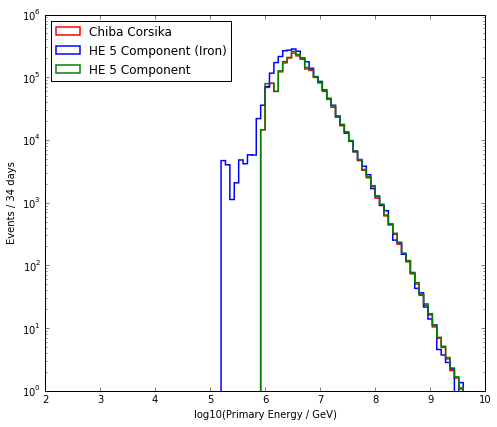

In [7]:
# First step is understanding what the coverage is for the primary energy
stuff = {'ds' : [dt_chiba, dt_hecoriron, dt_oldchiba],
        'col' : ['r','b','g'],
        'lbl' : ['Chiba Iron','HE 5 Component (Iron)', 'HE 5 Component'],
        'save' : ['chiba','hecoriron','hecor']
        }

nrg = ['corsika_PrimE','cor_PrimaryEnergy','corsika_PrimE']
       #'cor_PrimaryEnergy']

pt = PlotTool()
fig, ax = plt.subplots(ncols=1,figsize=(7,6))
for i in range(len(stuff['ds'])):
    dt = stuff['ds'][i]
    c  = stuff['col'][i]
    l  = stuff['lbl'][i]
    v  = nrg[i]
    
    pt.ploth1(np.log10(dt[v].as_matrix()),
              dt['w'].as_matrix(),
              'log10(Primary Energy / GeV)',
             C.lt_label, l,
             100,2,10,
             c,False,False)
    
    ax.set_yscale('log')

plt.legend(loc='upper left')    
plt.tight_layout()
#plt.savefig(savedir+'baseline.png')
print sum(dt_hecor['w']), sum(dt_hecoriron['w'])

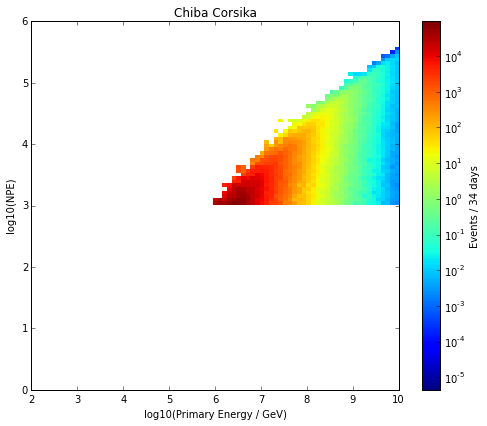

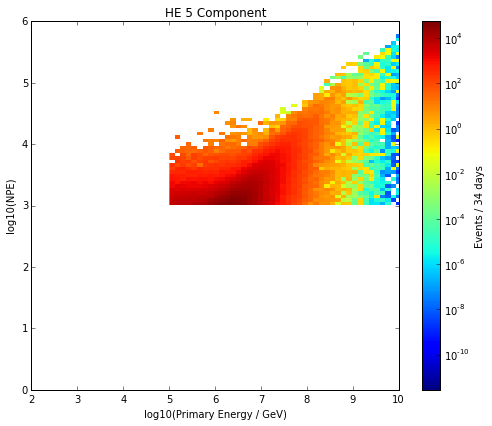

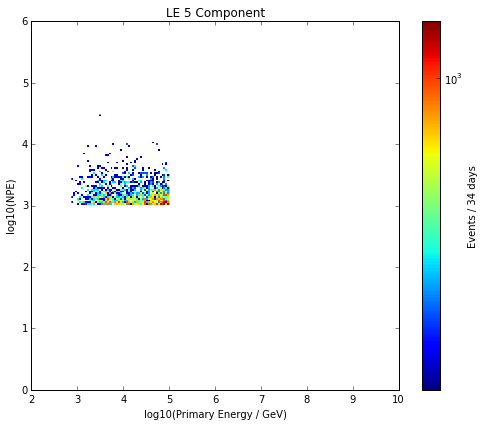

In [10]:
# Plot the relationship of energy vs. NPE

for i in range(len(stuff['ds'])):
    dt = stuff['ds'][i]
    c  = stuff['col'][i]
    l  = stuff['lbl'][i]
    v  = nrg[i]
    
    xvar = np.log10(dt[v].as_matrix())
    yvar = dt['log10(hs_q_tot_pulses)'].as_matrix()
    w    = dt['w'].as_matrix()
    
    plt.figure(figsize=(7,6))
    pt.ploth2(xvar,yvar,w,
             'log10(Primary Energy / GeV)',
             'log10(NPE)',
             C.lt_label,
             50,2,10,0,6,-1,-1,False)
    plt.title(l)
    cb = plt.colorbar()
    cb.set_label(C.lt_label)
    plt.tight_layout()
    
    #plt.savefig(savedir+stuff['save'][i]+"_NPEvsEnergy_baseline.png")
    

In [7]:
# What is the contribution of the LE sample:
nle = sum(dt_lecor['w'])
nhe = sum(dt_hecor['w'])
nvhe = sum(dt_chiba['w'])
print nle/(nhe+nle)
print nle/(nvhe+nle)

# Ok 10% is reasonable enough to keep...
# but for remainder of study just don't include it

0.121235926536
0.000958612975995


In [12]:
# Put the datasets together and run the comparison
dt_vhe = dt_chiba #pd.concat([dt_chiba,dt_lecor])
dt_he  = dt_oldchiba #dt_hecoriron #pd.concat([dt_hecor,dt_lecor])

# Add some variables for checks
from Cuts import qratio
dt_vhe['qratio'] = qratio(dt_vhe)
dt_he['qratio']  = qratio(dt_he)

In [15]:
# Build the info for the stacked plots

info = {'data' : [dt_vhe,dt_he],
        'names' : ['Chiba SPICE1', 'Chiba SPICE-MIE'], #'HE 5 Component Iron'],
        'weights' : ['w','w'],
        'colors' : ['b','r'],
        'lw' : [1.5,1.5],
        'ls' : ['solid','solid'],
        'marker' : [' ',' ']
       }

variables = {'hs_z_travel' : [50, -500, 500, 'ztravel','z-travel [m]'],
             'rho_travel'  : [50, 0, 1000, 'rhotravel', r'$\rho$-travel [m]'],
             'log10(hs_q_tot_pulses)' : [40, 3, 7, 'logqtot','log10(NPE)'],
             'log10(NPE)'     : [40, 3, 7, 'lognpe','log10(NPE) (portia)'],
             #'cos(ImpLF_zen)' : [30, -1, 1, 'coszen', r'cos($\theta$)'],
             'qratio'         : [100,0,1,'qratio','qratio'],
             'hm_nhit_doms'   : [50,0,1500, 'hitdoms', r'N Hit Doms'],
             'hm_nhit_strings': [86,0,86,'hitstrings','N Hit Strings'],
             'Nch'            : [50,0,1500, 'Nch', 'N Channel (portia)'],
             #'tlarge5[0]-tearly5[0]'  : [100, 0, 10000, 'tEarlyMinusLarge', 'tlarge-tearly'],
             #'risetimelarge5cumu[0]'  : [40, 0, 400, 'risetime0Cumu','Risetime0 (Cumulative) [ns]'],
             #'risetimelarge5[0]'  : [40, 0, 400, 'risetime0','Risetime0 [ns]'],
             #'risetimelarge5cumu[1]'  : [40, 0, 400, 'risetime1Cumu','Risetime1 (Cumulative) [ns]'],
             #'risetimelarge5[1]'  : [40, 0, 400, 'risetime1','Risetime1 [ns]'],
             #'widthlarge5[0]' : [40,0,400,'width0','Width0 [ns]'],
             #'widthlarge5[1]' : [40,0,400,'width1','Width1 [ns]'],
             'cumuAt600ns' : [25,0,1,'cumuAt600ns','Cumulative @ 600ns'],
             'widthAt50' : [50,0,2000,'widthAt50','Width @ 50% [ns]'],
             #'maxDist' : [25,0,1000,'maxDist','Max Dist 3 Largest Charge DOms'],
             'ImpLF_rchi2' : [50,0,350,'rchi2',r'Reduced $\chi^{2}$'],
             #'q_largest-q_onstring' : [100,-5000,2000,'qDiff','q_largest - q_onstring'],
             'hs_cogz' : [50,-500,500,'cog_z','COG z [m]'],
             'sqrt(hs_cogx*hs_cogx+hs_cogy*hs_cogy)' : [30,0,600,'cog_rho',r'COG $\rho$'],
             }

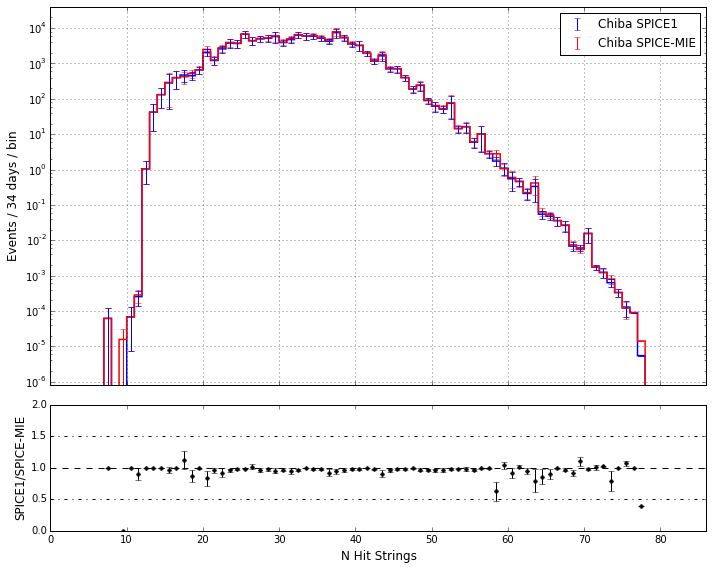

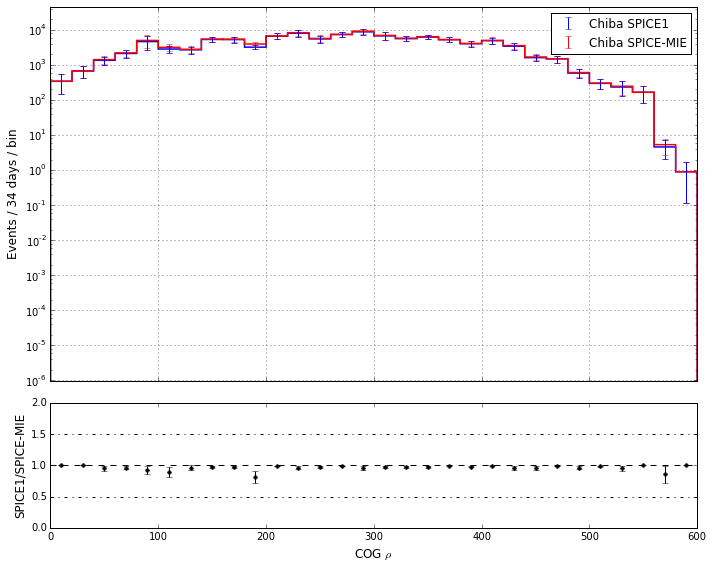

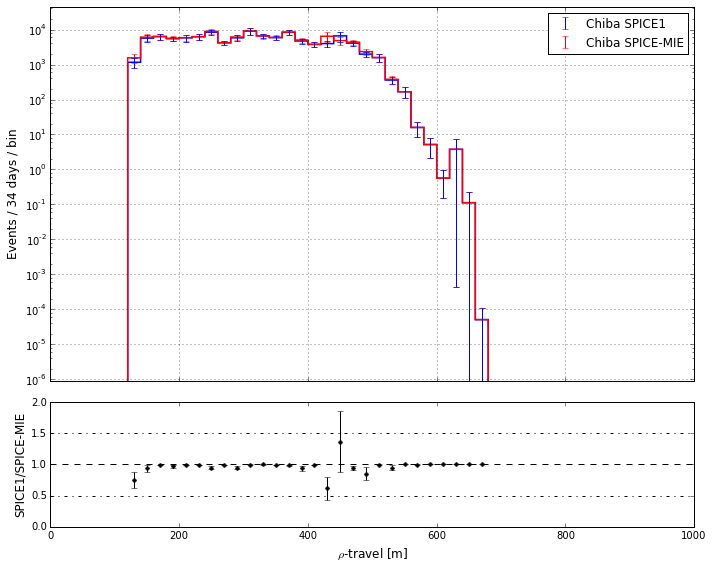

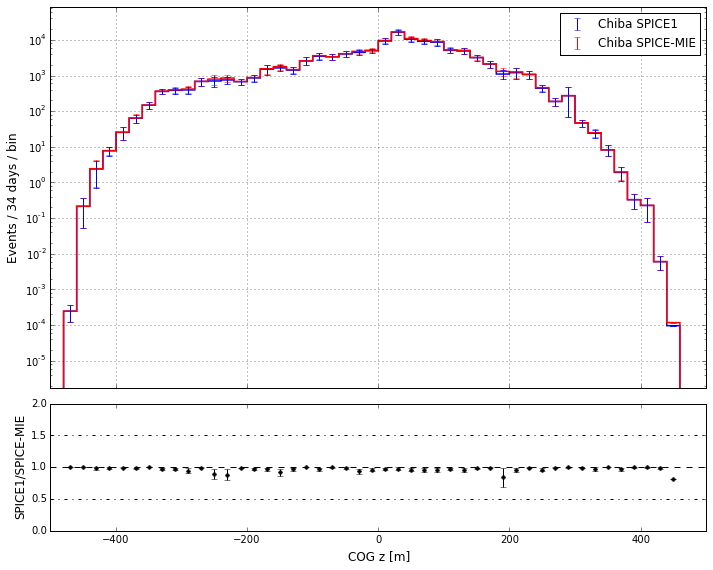

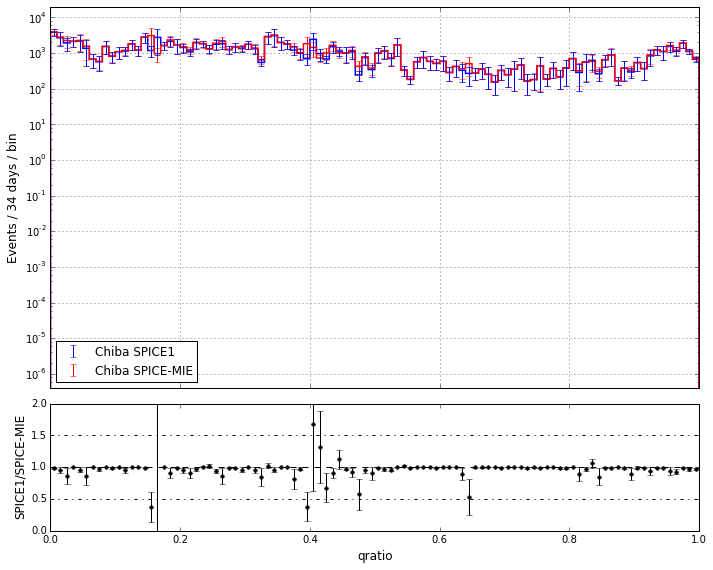

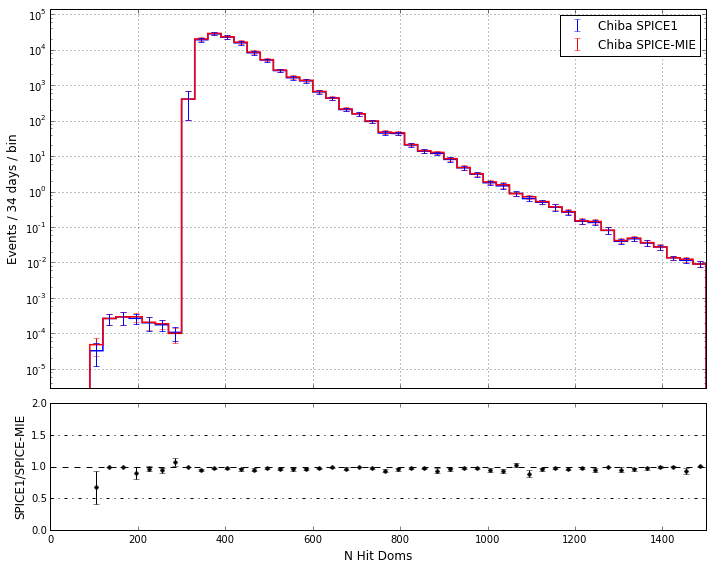

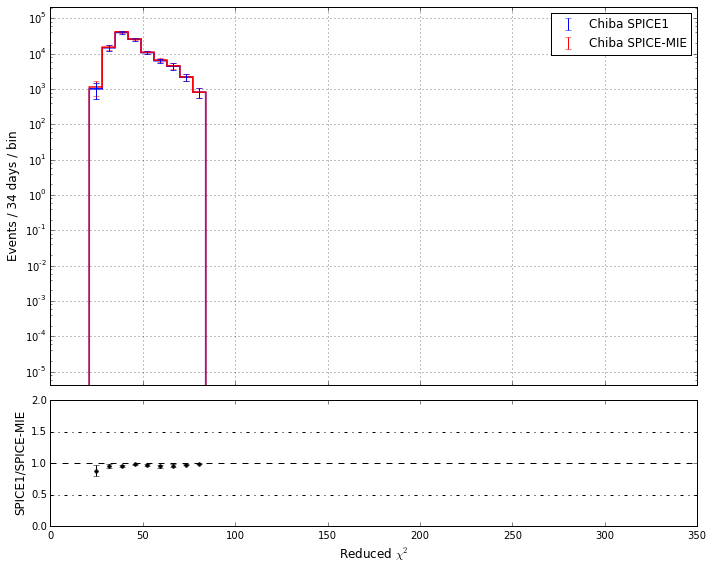

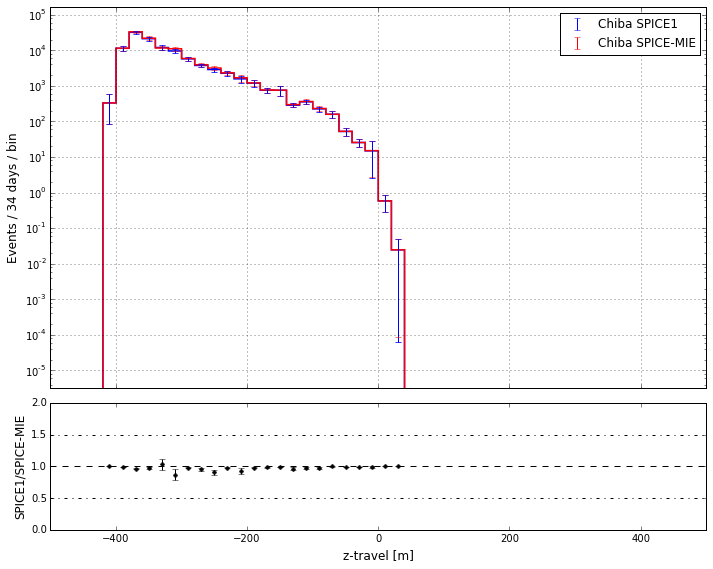

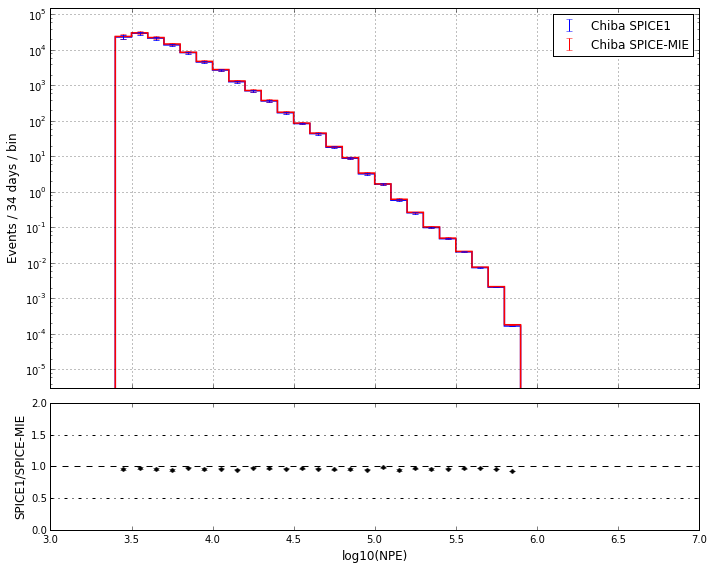

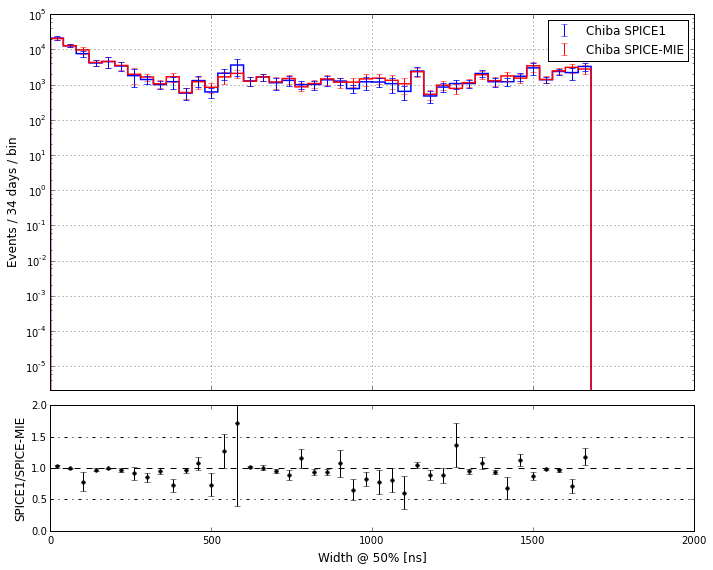

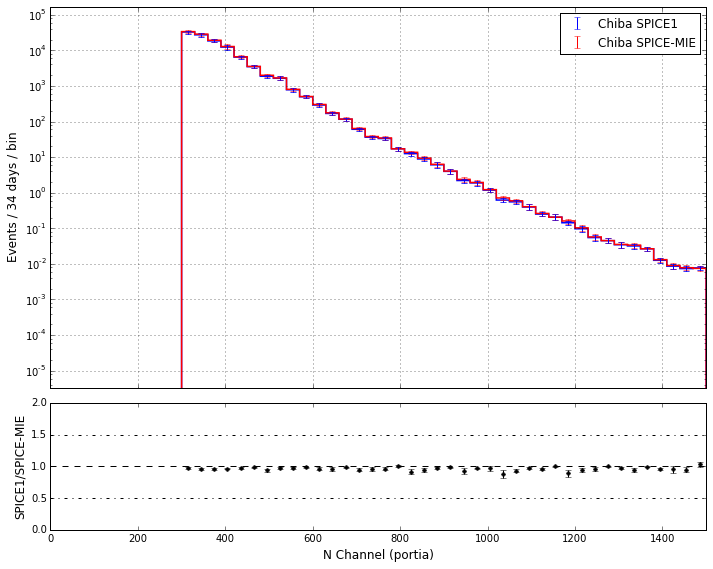

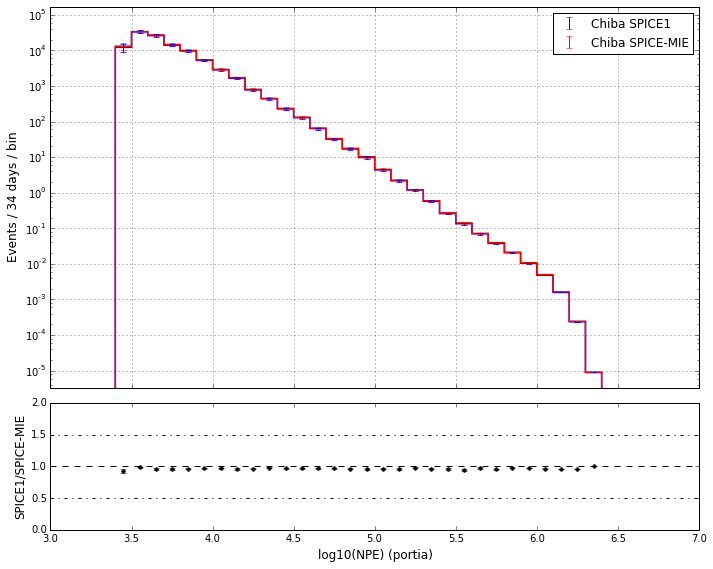

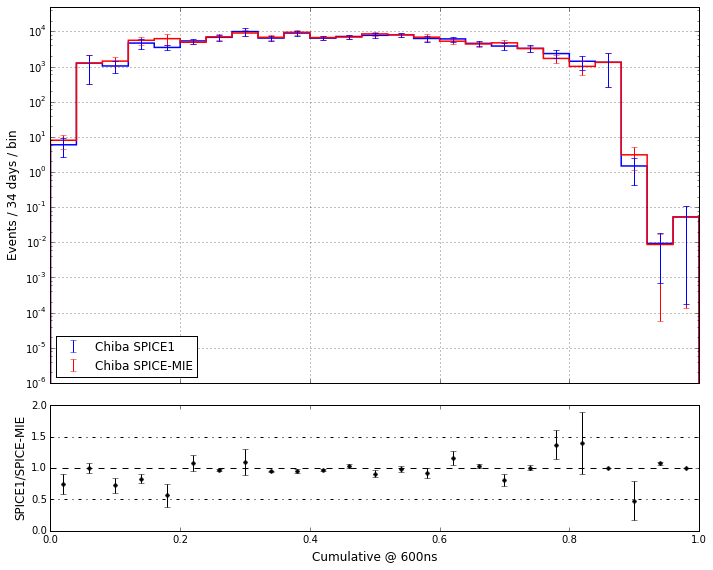

In [17]:
# Plot dat stuff

for var in variables:
    lims = variables[var]
    pt.plotStackedRatio(info,var,
                        lims[4],
                        lims[0],lims[1],lims[2],
                        1e-10,True,False,False,'',
                       'SPICE1/SPICE-MIE')
    
    plt.savefig(savedir+'vars_EHEL3_chibacomp_IceModel/'+lims[3])

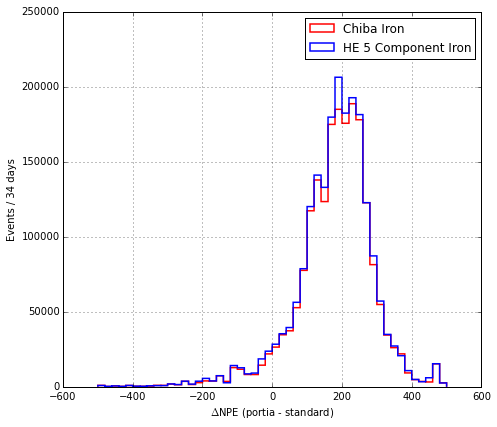

In [18]:
# Why is NPE roughly the same, and standard charge seems to be softer?
# Best I can guess is that it is related to how the pulses are calibrated
# meaning droop correction... One indication could be difference between
# NPE and portia NPE

fig,ax = plt.subplots(ncols=1,figsize=(7,6))
for i in range(len(info['data'])):
    data = info['data'][i]
    c  = info['colors'][i]
    l  = info['names'][i]

    xval = np.power(10,data['log10(NPE)'].as_matrix())
    xval -= np.power(10,data['log10(hs_q_tot_pulses)'].as_matrix())
    
    
    pt.ploth1(xval,data['w'].as_matrix(),
             r'$\Delta$NPE (portia - standard)', 
              C.lt_label, l,
             50, -500,500, c, False, False)
    
    #ax.set_yscale('log')
    
plt.legend(loc="best")    
plt.grid()
    

In [24]:
##
## TODO: Apply qratio cut and timing cut and look at final distribution
##

In [ ]:
# What about this